# analyze winning chances in Rabenspiel

find probability to win against the raven
do it with simulation

Results:

- winning chances for raven: ca. 32%
- number of raven cards left when game is finished:
  - median: 1.5 cards
  - 25 percentile: 3 cards

In [237]:
import random
import pandas as pd

def die_cast ():
    return(random.randint(0,5))

def play_game():
    # initiate a game
    game_start_state = {'resource':['yellow', 'red', 'blue', 'green', 'raven'],
              'state':[10,10,10,10,9]
             }
    game_state = pd.DataFrame(game_start_state)
    game_state.set_index('resource',inplace=True)
    i = 0 # rounds
    r = 0 # raven won
    while(sum(game_state.iloc[:4,0])>0 and game_state.iloc[4,0]>0):
        #print('sum '+str(sum(game_state.iloc[:4,0])))
        cast = die_cast()

        # fruit or raven
        if cast <=4:
            game_state.iloc[cast,0]= max(game_state.iloc[cast,0]-1,0)
        
        # basket
        if cast == 5:
            #basket --> take 2 fruits from biggest piles
            #print('basket')
            # get resources with highest count
            res_highest_count = game_state.iloc[:4].nlargest(2,'state',keep='first')
            for index, row in res_highest_count.iterrows():
                game_state.loc[index][0] = max(game_state.loc[index][0] - 1,0)
        i=i+1

    if(game_state.iloc[4,0]==0):
        r = 1
    return(i,r,game_state.iloc[4,0],1) # return rounds (i) and if raven has won (r=1)

   


# do simulation

In [304]:
number_of_runs = 1000

columns = ['round','raven won?','raven state','count']
results = pd.DataFrame([play_game() for j in range(number_of_runs)],columns=columns)

## histogram

1) how often does the raven win?

2) how many raven cards are left when came is finished?

runs:                       1000
raven winning percentage:   32.0 %


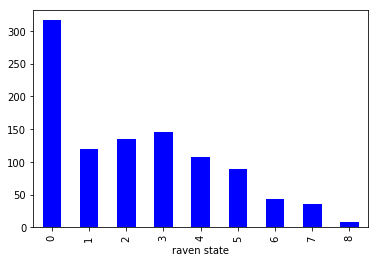

In [305]:
#print(results)
s=results.loc[:,'raven won?'].sum()
c=results.loc[:,'raven won?'].count()
#print(results.groupby('raven state').nunique())
#print('----')
#print(results.groupby('raven state').nunique().iloc[:,0].count())

print('runs:                       '+str(c))
print('raven winning percentage:   '+str(round(s/c,2)*100)+' %')
#
#results['raven state'].hist(color=['red'],bins=results.groupby('raven state').nunique().iloc[:,0].count())
results_grouped = results.groupby(['raven state'])['count'].count()
#print(results_grouped)
#print('----------------------')
results_grouped.plot(kind='bar',color='blue')


## CDF

how many raven cards are left? CDF plus quartiles

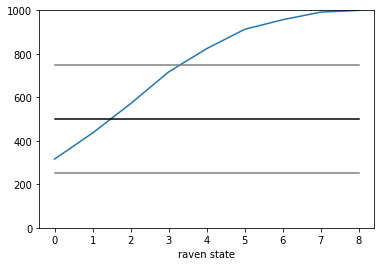

In [307]:
cdf = results_grouped.cumsum()
plt = cdf.plot()
plt.set_ylim(0,cdf.max())
plt.plot([cdf.max()/4 for i in range(cdf.count())],color='gray')
plt.plot([cdf.max()/2 for i in range(cdf.count())],color='black')
plt.plot([cdf.max()/4*3 for i in range(cdf.count())],color='gray')


# sandbox

In [113]:

game_start_state = {'resource':['yellow', 'red', 'blue', 'green', 'raven'],
                    'state':[5,10,6,4,9]
                }
game_state = pd.DataFrame(game_start_state)
game_state.set_index('resource',inplace=True)


res_highest_count = game_state.iloc[:4].nlargest(2,'state',keep='first')
print(type(res_highest_count))
for index, row in res_highest_count.iterrows():
    print('----')
    print(index)
    print(game_state.loc[index][0])
    game_state.loc[index][0] = game_state.loc[index][0] - 1
    
print('==========00')    
game_state
#print(sum(game_state.iloc[:4]))
game_state.iloc[:3,0]
sum(game_state.iloc[:3,0])

<class 'pandas.core.frame.DataFrame'>
----
red
10
----
blue
6
==========00


19

In [235]:
#print(results['raven state'])
results.groupby('raven state')
#results['raven state'].groupby('raven state').nunique()